# CONTENTS
1. IMPORTING LIBRARIES/DATA

2. DATA OVERVIEW

3. DATA PREP FOR REGRESSION ANALYSIS

4. REGRESSION ANALYSIS

# IMPORTING LIBRARIES/DATA

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# initialize path variable
path = r'/Users/smac_/Documents/Courses/CF Data Analytics Program/Data Immersion/Achievement 6/07-2023 NYC Airbnb Market Analysis'

In [3]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Processed Data', 'listings_clean.pkl'))

In [4]:
# display charts in notebook without "calling" them
%matplotlib inline

# DATA OVERVIEW

In [5]:
# first 5 rows
df.head()

,id,host_id,nbhd_group,nbhd,latitude,longitude,room_type,price,min_nights,reviews_count,last_review,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
0,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0
1,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1
2,14991,59023,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3
3,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1
4,59709,186084,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23


In [6]:
# last 5 rows
df.tail()

,id,host_id,nbhd_group,nbhd,latitude,longitude,room_type,price,min_nights,reviews_count,last_review,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
43561,905031073149861760,86368678,Brooklyn,Canarsie,40.633458,-73.899472,Entire home/apt,208,3,0,Unavailable,0.0,3,358,0
43562,905038362467988591,52064945,Brooklyn,Park Slope,40.677256,-73.981435,Private room,530,30,0,Unavailable,0.0,1,270,0
43563,905066559607295258,22541573,Manhattan,East Village,40.732530,-73.989880,Entire home/apt,382,30,0,Unavailable,0.0,132,288,0
43564,905077900484113845,151692758,Brooklyn,Canarsie,40.638210,-73.915920,Entire home/apt,199,2,0,Unavailable,0.0,1,155,0
43565,905109354552786380,25138314,Manhattan,Midtown,40.765086,-73.976717,Private room,662,1,0,Unavailable,0.0,116,250,0


In [7]:
# column names and data types
df.dtypes

id                     int64
host_id                int64
nbhd_group            object
nbhd                  object
latitude             float64
longitude            float64
room_type             object
price                  int64
min_nights             int64
reviews_count          int64
last_review           object
monthly_reviews      float64
host_list_count        int64
availability_365       int64
reviews_count_ltm      int64
dtype: object

In [8]:
# DataFrame size
df.shape

(43555, 15)

# DATA PREP FOR REGRESSION ANALYSIS

## HYPOTHESIS
As the minimum required booked nights increase, there is a corresponding decrease in the number of monthly reviews per listing.

## UNALTERED VARIABLES

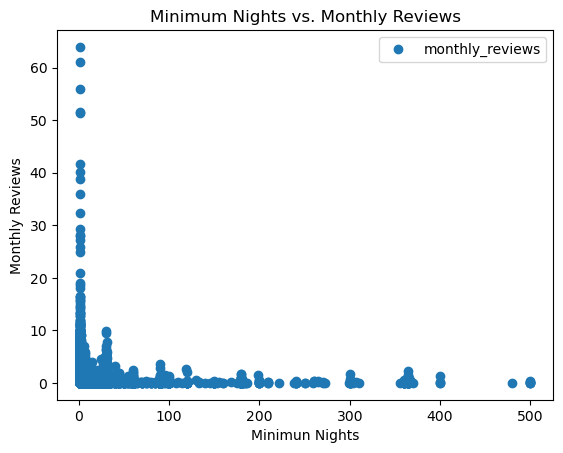

In [9]:
# generate scatterplot to review how the chosen variables plot against each other
df.plot(x='min_nights', y='monthly_reviews', style='o')
plt.title('Minimum Nights vs. Monthly Reviews')  
plt.xlabel('Minimun Nights')  
plt.ylabel('Monthly Reviews')  
plt.show()

In [10]:
# reshape selected variables into NumPy arrays
X_unaltered = df['min_nights'].values.reshape(-1, 1)
y_unaltered = df['monthly_reviews'].values.reshape(-1, 1)

In [11]:
X_unaltered

array([[30],
       [30],
       [ 5],
       ...,
       [30],
       [ 2],
       [ 1]])

In [12]:
y_unaltered

array([[0.29],
       [0.3 ],
       [0.14],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [13]:
# split data into training set & test set
X_unaltered_train, X_unaltered_test, y_unaltered_train, y_unaltered_test = train_test_split(X_unaltered, y_unaltered, test_size=0.3, random_state=0)

## ALTERED VARIABLES (OUTLIER REMOVAL)

In [14]:
# calculate the IQR of 'min_nights'
min_nights_q1 = df['min_nights'].quantile(0.25)
min_nights_q3 = df['min_nights'].quantile(0.75)
min_nights_IQR = min_nights_q3 - min_nights_q1
print(min_nights_IQR)

28.0


In [15]:
# define upper and lower bounds for outliers in 'min_nights'
min_nights_spread = 1.5 * min_nights_IQR
min_nights_upper_bound = min_nights_q3 + min_nights_spread
min_nights_lower_bound = min_nights_q1 - min_nights_spread
print(min_nights_upper_bound)

72.0


In [16]:
# calculate the IQR of 'monthly_reviews'
monthly_reviews_q1 = df['monthly_reviews'].quantile(0.25)
monthly_reviews_q3 = df['monthly_reviews'].quantile(0.75)
monthly_reviews_IQR = monthly_reviews_q3 - monthly_reviews_q1
print(monthly_reviews_IQR)

1.26


In [17]:
# define upper and lower bounds for outliers in 'monthly_reviews'
monthly_reviews_spread = 1.5 * monthly_reviews_IQR
monthly_reviews_upper_bound = monthly_reviews_q3 + monthly_reviews_spread
monthly_reviews_lower_bound = monthly_reviews_q1 - monthly_reviews_spread
print(monthly_reviews_upper_bound)

3.16


In [18]:
# initialize DataFrame without outliers in 'min_nights' & 'monthly_reviews'
df_test = df[(df['min_nights'] <= min_nights_upper_bound) & (df['monthly_reviews'] <= monthly_reviews_upper_bound)]

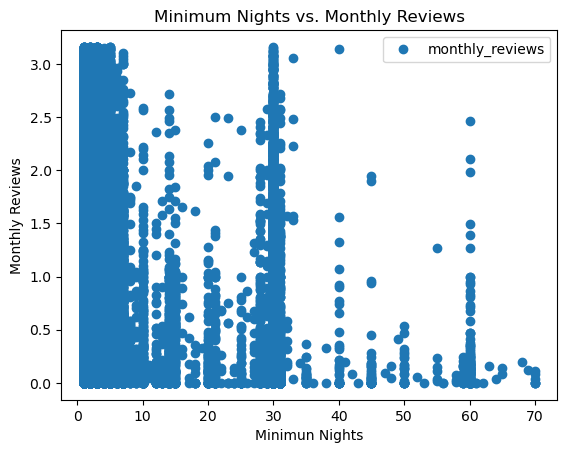

In [19]:
# generate scatterplot to review how the chosen variables plot against each other
df_test.plot(x='min_nights', y='monthly_reviews', style='o')
plt.title('Minimum Nights vs. Monthly Reviews')  
plt.xlabel('Minimun Nights')  
plt.ylabel('Monthly Reviews')  
plt.show()

In [20]:
# reshape selected variables into NumPy arrays
X_altered = df_test['min_nights'].values.reshape(-1, 1)
y_altered = df_test['monthly_reviews'].values.reshape(-1, 1)

In [21]:
X_altered

array([[30],
       [30],
       [ 5],
       ...,
       [30],
       [ 2],
       [ 1]])

In [22]:
y_altered

array([[0.29],
       [0.3 ],
       [0.14],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [23]:
# split data into training set & test set
X_altered_train, X_altered_test, y_altered_train, y_altered_test = train_test_split(X_altered, y_altered, test_size=0.3, random_state=0)

# REGRESSION ANALYSIS

## UNALTERED SET

In [24]:
# initialize regression object
regression_unaltered = LinearRegression()

In [25]:
# fit regression object onto training set
regression_unaltered.fit(X_unaltered_train, y_unaltered_train)

LinearRegression()

### APPLY MODEL TO TEST SET

In [26]:
# predict the values of y (dependent) using X (independent)
y_unaltered_predicted = regression_unaltered.predict(X_unaltered_test)

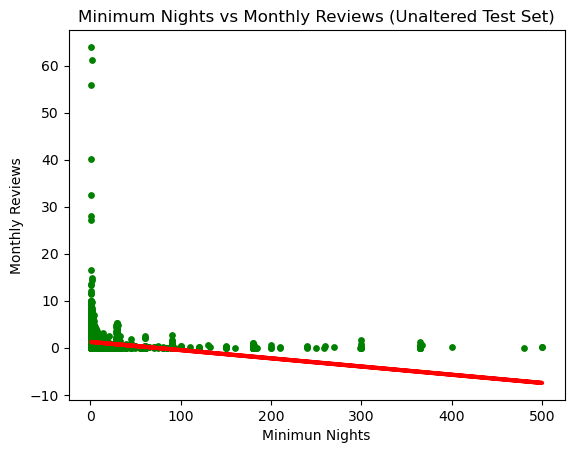

In [27]:
# generate plot to visualize model's regression line on test set

plot_unaltered_test = plt
plot_unaltered_test.scatter(X_unaltered_test, y_unaltered_test, color='g', s=15)
plot_unaltered_test.plot(X_unaltered_test, y_unaltered_predicted, color='red', linewidth=3)
plot_unaltered_test.title('Minimum Nights vs Monthly Reviews (Unaltered Test Set)')
plot_unaltered_test.xlabel('Minimun Nights')
plot_unaltered_test.ylabel('Monthly Reviews')
plot_unaltered_test.show()

The regression line applied to these variables does not seem to adequately capture the data within the training set. A non-linear distribution is evident between `'min_nights'` and `'monthly_reviews'`, with a concentration of data points skewed towards the left side of the graph. This observation highlights the model's lack of accuracy in representing the underlying relationship.

In [28]:
# create objects that contain model's summary stats
rmse_test_unaltered = mean_squared_error(y_unaltered_test, y_unaltered_predicted)
r2_test_unaltered = r2_score(y_unaltered_test, y_unaltered_predicted)

In [29]:
# print model's summary stats to evaluate performance
print ('Slope:' , regression_unaltered.coef_)
print('Mean Squared Error:' , rmse_test_unaltered)
print('R2 Score:' , r2_test_unaltered)

Slope: [[-0.01744191]]
Mean Squared Error: 2.942541894300463
R2 Score: 0.06762062819926407


In [30]:
# initialize DataFrame comparing the actual and predicted values of y
compare_unaltered = pd.DataFrame({'Actual' : y_unaltered_test.flatten(), 'Predicted' : y_unaltered_predicted.flatten()})
compare_unaltered.head(30)

,Actual,Predicted
0,0.22,0.200924
1,0.18,0.724181
2,2.13,1.212554
3,3.67,1.229996
4,3.75,1.229996
5,0.02,0.724181
6,0.19,1.177671
7,0.04,0.811390
8,3.63,1.212554
9,1.69,1.177671


### APPLY MODEL TO TRAINING SET

In [31]:
# predict the values of y (dependent) using X (independent) on TRAINING set to evaluate accuracy
y_unaltered_predicted_train = regression_unaltered.predict(X_unaltered_train)

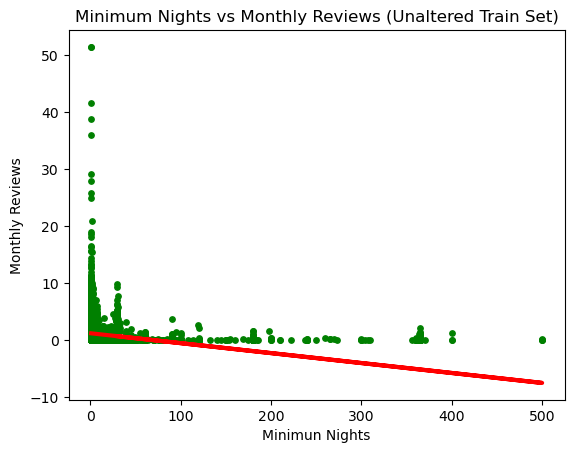

In [32]:
# generate plot to visualize model's regression line on test set

plot_unaltered_train = plt
plot_unaltered_train.scatter(X_unaltered_train, y_unaltered_train, color='g', s=15)
plot_unaltered_train.plot(X_unaltered_train, y_unaltered_predicted_train, color='r', linewidth=3)
plot_unaltered_train.title('Minimum Nights vs Monthly Reviews (Unaltered Train Set)')
plot_unaltered_train.xlabel('Minimun Nights')
plot_unaltered_train.ylabel('Monthly Reviews')
plot_unaltered_train.show()

In [33]:
# create objects that contain model's summary stats
rmse_train_unaltered = mean_squared_error(y_unaltered_train, y_unaltered_predicted_train)
r2_train_unaltered = r2_score(y_unaltered_train, y_unaltered_predicted_train)

In [34]:
# print model's summary stats to evaluate performance
print ('Slope:' , regression_unaltered.coef_)
print('Mean Squared Error:' , rmse_train_unaltered)
print('R2 Score:' , r2_train_unaltered)

Slope: [[-0.01744191]]
Mean Squared Error: 2.264412062264117
R2 Score: 0.07998355951560865


## PERFORMANCE INTERPRETATION

* The slope value validates a subtle negative relationship between the variables.
* The notable magnitude of the Mean Squared Error (MSE) implies that the model's predictions exhibit considerable deviations from the actual values.
* With an R-squared value of around 7%, the model's accuracy is minimal. This outcome signifies an inadequate fit, rendering it essentially incapable of effectively predicting the dependent variable.

## ALTERED SET

In [35]:
# initialize regression object
regression_altered = LinearRegression()

In [36]:
# fit regression object onto training set
regression_altered.fit(X_altered_train, y_altered_train)

LinearRegression()

### APPLY MODEL TO TEST SET

In [37]:
# predict the values of y (dependent) using X (independent)
y_altered_predicted = regression_altered.predict(X_altered_test)

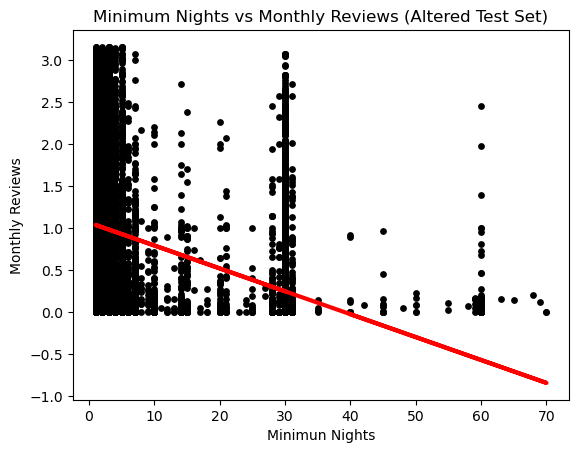

In [38]:
# generate plot to visualize model's regression line on test set

plot_altered_test = plt
plot_altered_test.scatter(X_altered_test, y_altered_test, color='k', s=15)
plot_altered_test.plot(X_altered_test, y_altered_predicted, color='red', linewidth=3)
plot_altered_test.title('Minimum Nights vs Monthly Reviews (Altered Test Set)')
plot_altered_test.xlabel('Minimun Nights')
plot_altered_test.ylabel('Monthly Reviews')
plot_altered_test.show()

By eliminating outliers from both variables, a profound shift occurs in the distribution of data points, enabling a more precise comprehension of the plot's patterns. Nevertheless, the regression line still falls short in effectively encompassing the training set's data, exhibiting only marginal improvement compared to the unaltered dataset. Notably, the most significant cluster of data points becomes more discernible, primarily situated where X spans from 0 to 10. This reaffirms the model's inadequacy in accommodating this specific set of variables.

In [39]:
# create objects that contain model's summary stats
rmse_test_altered = mean_squared_error(y_altered_test, y_altered_predicted)
r2_test_altered = r2_score(y_altered_test, y_altered_predicted)

In [40]:
# print model's summary stats to evaluate performance
print ('Slope:' , regression_altered.coef_)
print('Mean Squared Error:' , rmse_test_altered)
print('R2 Score:' , r2_test_altered)

Slope: [[-0.02730039]]
Mean Squared Error: 0.5132140145987499
R2 Score: 0.22657914756612374


In [41]:
# initialize DataFrame comparing the actual and predicted values of y
compare_altered = pd.DataFrame({'Actual' : y_altered_test.flatten(), 'Predicted' : y_altered_predicted.flatten()})
compare_altered.head(30)

,Actual,Predicted
0,0.00,0.246777
1,0.22,0.246777
2,0.17,0.246777
3,2.92,1.011188
4,2.37,0.929286
5,0.00,1.038488
6,0.08,0.246777
7,0.00,0.246777
8,0.00,1.038488
9,0.01,0.246777


### APPLY MODEL TO TRAINING SET

In [42]:
# predict the values of y (dependent) using X (independent) on TRAINING set to evaluate accuracy
y_altered_predicted_train = regression_altered.predict(X_altered_train)

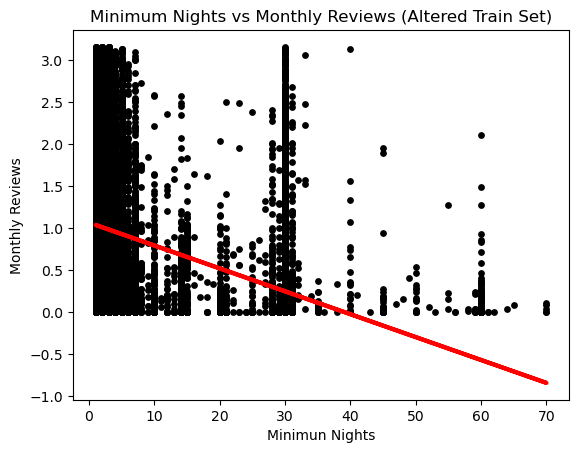

In [43]:
# generate plot to visualize model's regression line on test set

plot_altered_train = plt
plot_altered_train.scatter(X_altered_train, y_altered_train, color='k', s=15)
plot_altered_train.plot(X_altered_train, y_altered_predicted_train, color='red', linewidth=3)
plot_altered_train.title('Minimum Nights vs Monthly Reviews (Altered Train Set)')
plot_altered_train.xlabel('Minimun Nights')
plot_altered_train.ylabel('Monthly Reviews')
plot_altered_train.show()

In [44]:
# create objects that contain model's summary stats
rmse_train_altered = mean_squared_error(y_altered_train, y_altered_predicted_train)
r2_train_altered = r2_score(y_altered_train, y_altered_predicted_train)

In [45]:
# print model's summary stats to evaluate performance
print ('Slope:' , regression_altered.coef_)
print('Mean Squared Error:' , rmse_train_altered)
print('R2 Score:' , r2_train_altered)

Slope: [[-0.02730039]]
Mean Squared Error: 0.5155674962897078
R2 Score: 0.22083341544812385


## PERFORMANCE INTERPRETATION

* The slope value remains consistent when constrasted with the unaltered set.
* There is a notable decrease in the Mean Squared Error compared to the unaltered dataset, signifying an enhanced predictive performance with reduced discrepancies between predictions and actual values.
* The R-squared value experiences a notable increase, ascending from 7% to 22% when outliers are excluded from the variables. Nonetheless, despite this improvement, the score remains notably deficient and falls short of being considered a reliable fit.